# Testing if .csv file can be loaded and read

In [7]:


import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Used relative path of file
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')

# Display the entire DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(2))

FileNotFoundError: [Errno 2] No such file or directory: 'U.S. Military Deaths by cause 1980-2010.csv'

##  This code provide context on the size and shape of the dataframe

In [ ]:
# Count the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the counts
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 31
Number of columns: 14


# Cumalative sum of every type of death

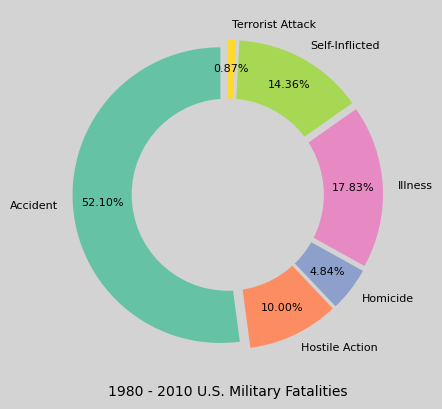

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

# Calculate the sum of types of deaths
Total_Deaths = df['Total Deaths'].sum() # Not needed
Accident_Deaths = df['Accident'].sum()
Hostile_Action = df['Hostile Action'].sum()
Homicide = df['Homicide'].sum()
Illness = df['Illness'].sum()
Self_Inflicted = df['Self-Inflicted'].sum()
Terrorist_Attack = df['Terrorist Attack'].sum()

# Assigned a variable of for the sums of each death
y = [Accident_Deaths, Hostile_Action, Homicide, Illness, Self_Inflicted, Terrorist_Attack]

# Asigned a variable for the labels to be used in the chart
labels = ['Accident', 'Hostile Action', 'Homicide', 'Illness', 'Self-Inflicted', 'Terrorist Attack']

# Created 3 variables for easy customization of sizes
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12


# Used the plt.rc method. This method refers to resource configuration in Matplotlib
# Method allows for customization of component font sizes

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Created a chart template with a light gray background
fig = plt.figure(facecolor='lightgray')

# Labeled the x axis
plt.xlabel('1980 - 2010 U.S. Military Fatalities')

# Created a modified pie chart
plt.pie(
    x=y, labels=labels,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
)

# Created the variable hole
# Defined coordinates of location (center), and the desired radius (0.65)
# Set the color to match the rest of the chart
hole = plt.Circle((0, 0), 0.65, facecolor='lightgray')

# Created the function plt.gcf() ("Get Current Figure")
# Created the funtion .gca() ("Get Current Axes")
# Used the add_artist(hole) method. This method is designed to add graphical artists to the plot
plt.gcf().gca().add_artist(hole)

# Shows the final chart
plt.show()

## Create a visual timeline of U.S. Military Population

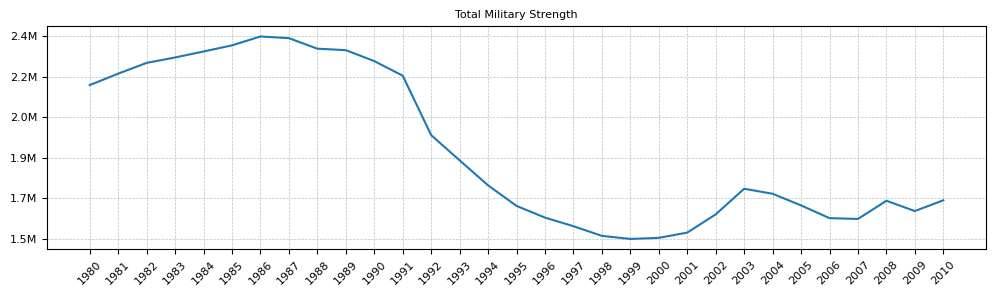

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Assigned the .csv to a dataframe with the variable df
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')

# Created variable for Calendar Year column
calendar_year = df['Calendar Year']

# Created variable for Calendar Year column
active_duty = df['Total Military FTE']

# Created figure size
plt.figure(figsize=(10, 3)) 

# Created plot chart using the two variables created above
plt.plot(calendar_year, active_duty)
#plt.xlabel('Calendar Year') # x axis label
# plt.ylabel('Population') # y axis label
plt.title('Total Military Strength') # Title of chart

# x-axis tick marks and labels
plt.xticks(calendar_year, rotation=45)  # Set x-axis tick marks to the calendar year values. 45 degree angle used for easier formatting.

# y-axis tick marks and labels
# Set desired number of y-axis tickers based off the min and max of the values. Set number of ticks to 6.
y_ticks = np.linspace(active_duty.min(), active_duty.max(), 6)  

# function created to specify where the ticks are to be and passed the variable y_ticks as a reference.
plt.yticks(y_ticks) 



# Created a function to customize how the y ticks are the graph would be represented
# Reduced wasted space in graph by restricting the ticks to limited values
def format_y_tick(x, pos):
    
    # Created the variable millions. Variable is the value of x divided by 1,000,000. 
    # Intent of function is to create ticks that are easy to read and understand
    millions = x / 1000000
    if millions.is_integer(): # checking to determine if the variable millions is an integer
        return f'{int(millions)}M' # used an 'f string to return the int of the millions variable and appended the char M to denote million
    else: # else used if the value in the variable millions is not an integer and contains a decimal place, return
        return f'{millions:.1f}M' # if the else is executed, the value in the millions value formatted with one decimal place and append the char M

# The .gca() function returns the current axes for the figure, specifically the y axis. 
# used the method .set_major_formatter to activate the tick label formatter
# used the ticker.FuncFormatter class from the matplotlib.ticker module
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))  # Format tick labels as '1M', '1.1M', '1.2M', etc.

plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)


plt.show()

## Created 3 doughnut charts to show historical population

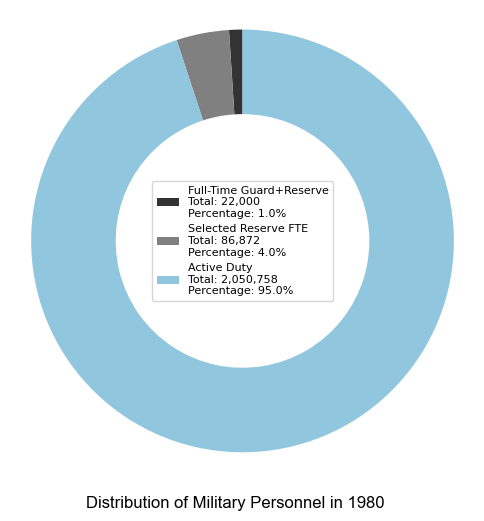

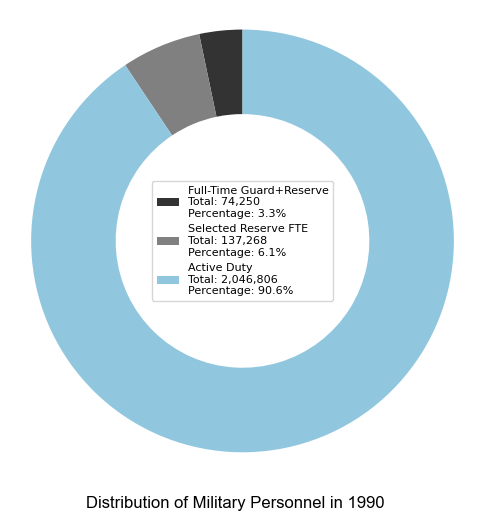

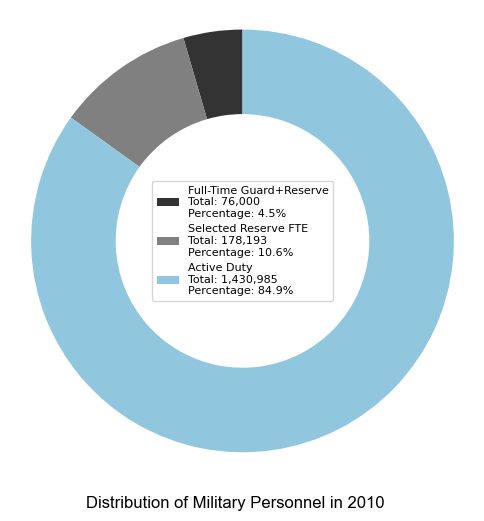

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale

# Used the locale module and setlocale function
# Set locale to an empty string. Intent is to have this code add commas with numerical values 
locale.setlocale(locale.LC_ALL, '')

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')

# Removed leading or trailing whitespace
df.columns = df.columns.str.strip()

# Created the years variable years. Assigned it to a list of specific years from the dataframe that will be used.
years = [1980, 1990, 2010]

# Define the color palette for the doughnut charts
colors = ['#333333', '#808080', '#90c7de']

# Created a for loop to create three charts at one using difference columns of data. The columns are defined in the years variable.
for year in years:
    # Variable df_year created and assigned to the dataframe. The column Calendar Year will be searched and if any of the values equal the year, only that row of data will be retrieved
    df_year = df[df['Calendar Year'] == year]
    
    # Variable values created and assigned to a list. Uses the df_year variable previously defined and then retrives the values in the selected columns. The values.flatten() function was used to convert dataframe into a 1D array
    values = df_year[['Active Duty', 'Full-Time (est) Guard+Reserve', 'Selected Reserve FTE']].values.flatten()
    
    # Variable labels created. Matches the labels to the identifed columns that will be used in the three doughnut charts. Chart 1 = 'Active Duty'...etc
    labels = ['Active Duty', 'Full-Time Guard+Reserve', 'Selected Reserve FTE']

    # Two variables created. This line of code dictactes that the doughnut segments are not randomly created but arranged in increasing order
    # Used the zip function to pair with the values and labels already created and stored in variables. A tuple is created matching these, then sorted based on the values, then unziped into the sorted_variables and sorted_labels
    sorted_values, sorted_labels = zip(*sorted(zip(values, labels)))

    # Created a figure object. Size modified in a square format.
    plt.figure(figsize=(6, 6))  

    # Outer ring of doughnut created with the plt.pie function. the [1] represents the entire ring. Colors, size and starting angle identifed. Width of ring assigned.
    plt.pie([1], colors=['white'], radius=0.65, startangle=90, wedgeprops=dict(width=0.3))

    # Variable wedges and _ are assigned to the plt.pie format. The wedges variable is intended to return a list of Wedge objects representing all chart segments.
    wedges, _ = plt.pie(sorted_values, labels=None, startangle=90, colors=colors, wedgeprops=dict(width=0.4))

    # Variable total created and assigned the value of the sum of sorted_values. The sorted values variable was defined earlier
    # Value to be returned to total is the total number of military personnel
    total = sum(sorted_values)
    
    # Variable percentages created and assigned an f string that calculates the percentage contribution of each segment in the inner pie chart 
    # by dividing each value (v) by the total and formatting it as a percentage string with one decimal place using the f'{v / total * 100:.1f}%' expression.
    percentages = [f'{v / total * 100:.1f}%' for v in sorted_values]

    # Variable formatted_values created
    # formats the value v from sorted values using the locale module
    # A percentage representation is desired in the formatting so the '%d" is used as a format specifier
    formatted_values = [locale.format_string('%d', v, grouping=True) for v in sorted_values]

    # Variable legend labels created. Value of variable determined by f string code that creates a formatted string that combines the label, formatted_value, and percentage for each category.
    # Next this code used a for loop to iterate over the variables label, formatted_vale and percentage, zipping them to combine the three lists into tuples
    legend_labels = [f'{label}\nTotal: {formatted_value}\nPercentage: {percentage}' for label, formatted_value, percentage in zip(sorted_labels, formatted_values, percentages)]
    
    # Creates a legend plt.legend() function. 
    # It takes two arguments: wedges, which represents the pie chart segments, and legend_labels, which represents the labels to be displayed in the legend.
    plt.legend(wedges, legend_labels, loc='center', prop={'size': 8})

    # This line of code uses the plyplot module and uses its axis function
    # The parameter equal is passed through the function to set the aspect ratio to equal, ensuring the x and y axis are on the same scale
    plt.axis('equal')

    # Using another function of the pyplot module called suptitle
    # Inside the function, an f string is used to label the title. The year value is embedded as part of the loop
    # Positioning parameters set, y=0.07 is used to specify vertical position of the title. The set parameter is 7% from the bottom. Used the fontname parameter, assigning Arial
    plt.suptitle(f'Distribution of Military Personnel in {year}', y=0.07, fontname='Arial')

    plt.show()

# Created 6 Charts To Show Trends
### Used Ratio of per 100k Solders 

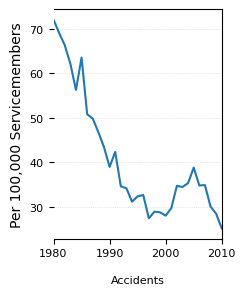

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
accidents = df['Accident']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (accidents / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Accidents', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

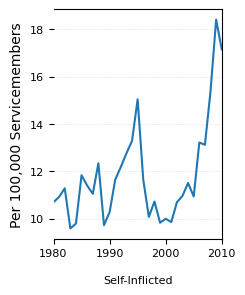

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
self_inflicted = df['Self-Inflicted']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (self_inflicted / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Self-Inflicted', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

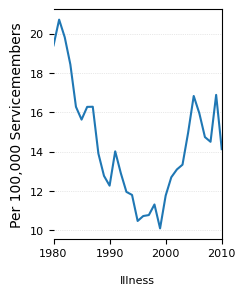

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
illness = df['Illness']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (illness / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Illness', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
total_deaths = df['Total Deaths']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (total_deaths / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Total Deaths', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'U.S. Military Deaths by cause 1980-2010.csv'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('Data/U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
hostile_action = df['Hostile Action']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (hostile_action / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Hostile Action', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/U.S. Military Deaths by cause 1980-2010.csv'

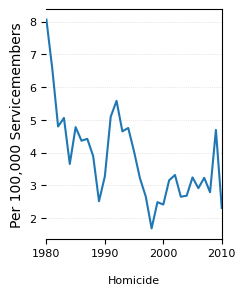

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
homicide = df['Homicide']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (homicide / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Homicide', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

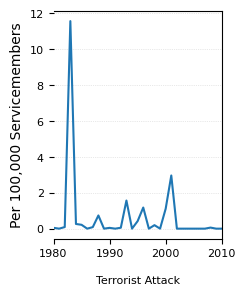

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

calendar_year = df['Calendar Year']
total_fte = df['Total Military FTE']
terrorist_attack = df['Terrorist Attack']

# Calculate the ratio of accidents to total military FTE per 100,000 servicemembers
ratio = (terrorist_attack / total_fte) * 100000

# Determine the ratio label based on the ratio used
ratio_label = "Per 100,000 Servicemembers"

# Desired figure size
plt.figure(figsize=(2.5, 3))

plt.plot(calendar_year, ratio)
plt.xlim(1980, 2010)

# Remove x-axis label
plt.xlabel(None)

# Lighten the horizontal gridlines
plt.gca().yaxis.grid(color='lightgray', linestyle=':', linewidth=0.5)

# Position the title below the x-axis, outside the graph, and centered
plt.title('Terrorist Attack', pad=-7, loc='center', y=-0.15)

plt.gca().spines['left'].set_visible(False)  # Remove left spine after gridlines are drawn

# Set y-axis label with the specific ratio label
plt.ylabel(ratio_label)

plt.tight_layout()  # Adjust spacing to prevent overlapping

plt.show()

## Created Charts to Show Percentage Change Trends

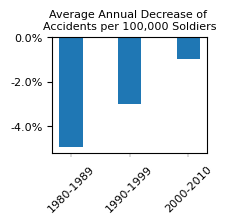

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

# Filter the data for different time periods
df_1980_1989 = df[(df['Calendar Year'] >= 1980) & (df['Calendar Year'] <= 1989)].copy()
df_1990_1999 = df[(df['Calendar Year'] >= 1990) & (df['Calendar Year'] <= 1999)].copy()
df_2000_2010 = df[(df['Calendar Year'] >= 2000) & (df['Calendar Year'] <= 2010)].copy()

# Calculate the average annual decrease per 100,000 soldiers for each time period
df_1980_1989.loc[:, 'Accidents per 100,000 Soldiers'] = (df_1980_1989['Accident'] / df_1980_1989['Total Military FTE']) * 100000
avg_decrease_1980_1989 = ((df_1980_1989['Accidents per 100,000 Soldiers'].iloc[-1] / df_1980_1989['Accidents per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1980_1989)) - 1) * 100

df_1990_1999.loc[:, 'Accidents per 100,000 Soldiers'] = (df_1990_1999['Accident'] / df_1990_1999['Total Military FTE']) * 100000
avg_decrease_1990_1999 = ((df_1990_1999['Accidents per 100,000 Soldiers'].iloc[-1] / df_1990_1999['Accidents per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1990_1999)) - 1) * 100

df_2000_2010.loc[:, 'Accidents per 100,000 Soldiers'] = (df_2000_2010['Accident'] / df_2000_2010['Total Military FTE']) * 100000
avg_decrease_2000_2010 = ((df_2000_2010['Accidents per 100,000 Soldiers'].iloc[-1] / df_2000_2010['Accidents per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_2000_2010)) - 1) * 100

# Set the figure size
plt.figure(figsize=(2, 1.5))

# Create a bar chart to visualize the average annual decrease for each time period
time_periods = ['1980-1989', '1990-1999', '2000-2010']
average_decreases = [avg_decrease_1980_1989, avg_decrease_1990_1999, avg_decrease_2000_2010]

bar_width = 0.4  # Adjust the width of the bars
spacing = 0.1  # Adjust the spacing between the bars

plt.bar(time_periods, average_decreases, width=bar_width, align='center')

# plt.xlabel('Time Period')
# plt.ylabel('Average Annual Decrease (%)')
plt.title('Average Annual Decrease of \nAccidents per 100,000 Soldiers')

# Set the desired distance between the x-axis gridlines
plt.gca().xaxis.set_tick_params(which='both', width=0.2, length=3, pad=5)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)

plt.grid(False)  # Remove gridlines
plt.xticks(rotation=45)  # Rotate x-axis tick labels if needed

plt.show()

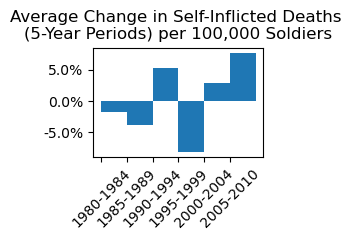

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('C:/Users/ashto/OneDrive/Desktop/Mid Term Data Sets/Repositories/US_Military_Deaths_1980-2010/Data/U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

# Filter the data for different time periods
df_1980_1984 = df[(df['Calendar Year'] >= 1980) & (df['Calendar Year'] <= 1984)].copy()
df_1985_1989 = df[(df['Calendar Year'] >= 1985) & (df['Calendar Year'] <= 1989)].copy()
df_1990_1994 = df[(df['Calendar Year'] >= 1990) & (df['Calendar Year'] <= 1994)].copy()
df_1995_1999 = df[(df['Calendar Year'] >= 1995) & (df['Calendar Year'] <= 1999)].copy()
df_2000_2004 = df[(df['Calendar Year'] >= 2000) & (df['Calendar Year'] <= 2004)].copy()
df_2005_2010 = df[(df['Calendar Year'] >= 2005) & (df['Calendar Year'] <= 2010)].copy()

# Calculate the average annual decrease per 100,000 soldiers for each time period
df_1980_1984.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_1980_1984['Self-Inflicted'] / df_1980_1984['Total Military FTE']) * 100000
avg_decrease_1980_1984 = ((df_1980_1984['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_1980_1984['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1980_1984)) - 1) * 100

df_1985_1989.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_1985_1989['Self-Inflicted'] / df_1985_1989['Total Military FTE']) * 100000
avg_decrease_1985_1989 = ((df_1985_1989['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_1985_1989['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1985_1989)) - 1) * 100

df_1990_1994.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_1990_1994['Self-Inflicted'] / df_1990_1994['Total Military FTE']) * 100000
avg_decrease_1990_1994 = ((df_1990_1994['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_1990_1994['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1990_1994)) - 1) * 100

df_1995_1999.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_1995_1999['Self-Inflicted'] / df_1995_1999['Total Military FTE']) * 100000
avg_decrease_1995_1999 = ((df_1995_1999['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_1995_1999['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1995_1999)) - 1) * 100

df_2000_2004.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_2000_2004['Self-Inflicted'] / df_2000_2004['Total Military FTE']) * 100000
avg_decrease_2000_2004 = ((df_2000_2004['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_2000_2004['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_2000_2004)) - 1) * 100

df_2005_2010.loc[:, 'Self-Inflicted per 100,000 Soldiers'] = (df_2005_2010['Self-Inflicted'] / df_2005_2010['Total Military FTE']) * 100000
avg_decrease_2005_2010 = ((df_2005_2010['Self-Inflicted per 100,000 Soldiers'].iloc[-1] / df_2005_2010['Self-Inflicted per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_2005_2010)) - 1) * 100

# Set the figure size
plt.figure(figsize=(2.5, 2.5))

# Create a bar chart to visualize the average annual decrease for each time period
time_periods = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2010']
average_decreases = [avg_decrease_1980_1984, avg_decrease_1985_1989, avg_decrease_1990_1994,
                     avg_decrease_1995_1999, avg_decrease_2000_2004, avg_decrease_2005_2010]

bar_width = 1.0  # Adjust the width of the bars (set to 1 for bars to touch)
spacing = 0.1  # Adjust the spacing between the bars

plt.bar(time_periods, average_decreases, width=bar_width, align='edge')

# plt.xlabel('Time Period')
plt.title('Average Change in Self-Inflicted Deaths \n(5-Year Periods) per 100,000 Soldiers')

plt.xticks(rotation=45)  # Rotate x-axis tick labels if needed

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)

plt.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

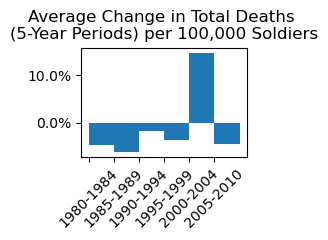

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('C:/Users/ashto/OneDrive/Desktop/Mid Term Data Sets/Repositories/US_Military_Deaths_1980-2010/Data/U.S. Military Deaths by cause 1980-2010.csv')
df.columns = df.columns.str.strip()

# Filter the data for different time periods
df_1980_1984 = df[(df['Calendar Year'] >= 1980) & (df['Calendar Year'] <= 1984)].copy()
df_1985_1989 = df[(df['Calendar Year'] >= 1985) & (df['Calendar Year'] <= 1989)].copy()
df_1990_1994 = df[(df['Calendar Year'] >= 1990) & (df['Calendar Year'] <= 1994)].copy()
df_1995_1999 = df[(df['Calendar Year'] >= 1995) & (df['Calendar Year'] <= 1999)].copy()
df_2000_2004 = df[(df['Calendar Year'] >= 2000) & (df['Calendar Year'] <= 2004)].copy()
df_2005_2010 = df[(df['Calendar Year'] >= 2005) & (df['Calendar Year'] <= 2010)].copy()

# Calculate the average annual decrease per 100,000 soldiers for each time period
df_1980_1984.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_1980_1984['Total Deaths'] / df_1980_1984['Total Military FTE']) * 100000
avg_decrease_1980_1984 = ((df_1980_1984['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_1980_1984['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1980_1984)) - 1) * 100

df_1985_1989.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_1985_1989['Total Deaths'] / df_1985_1989['Total Military FTE']) * 100000
avg_decrease_1985_1989 = ((df_1985_1989['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_1985_1989['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1985_1989)) - 1) * 100

df_1990_1994.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_1990_1994['Total Deaths'] / df_1990_1994['Total Military FTE']) * 100000
avg_decrease_1990_1994 = ((df_1990_1994['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_1990_1994['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1990_1994)) - 1) * 100

df_1995_1999.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_1995_1999['Total Deaths'] / df_1995_1999['Total Military FTE']) * 100000
avg_decrease_1995_1999 = ((df_1995_1999['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_1995_1999['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_1995_1999)) - 1) * 100

df_2000_2004.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_2000_2004['Total Deaths'] / df_2000_2004['Total Military FTE']) * 100000
avg_decrease_2000_2004 = ((df_2000_2004['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_2000_2004['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_2000_2004)) - 1) * 100

df_2005_2010.loc[:, 'Total Deaths per 100,000 Soldiers'] = (df_2005_2010['Total Deaths'] / df_2005_2010['Total Military FTE']) * 100000
avg_decrease_2005_2010 = ((df_2005_2010['Total Deaths per 100,000 Soldiers'].iloc[-1] / df_2005_2010['Total Deaths per 100,000 Soldiers'].iloc[0]) ** (1 / len(df_2005_2010)) - 1) * 100

# Set the figure size
plt.figure(figsize=(2.5, 2.5))

# Create a bar chart to visualize the average annual decrease for each time period
time_periods = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2010']
average_decreases = [avg_decrease_1980_1984, avg_decrease_1985_1989, avg_decrease_1990_1994,
                     avg_decrease_1995_1999, avg_decrease_2000_2004, avg_decrease_2005_2010]

bar_width = 1.0  # Adjust the width of the bars (set to 1 for bars to touch)
spacing = 0.1  # Adjust the spacing between the bars

plt.bar(time_periods, average_decreases, width=bar_width, align='edge')

# plt.xlabel('Time Period')
plt.title('Average Change in Total Deaths \n(5-Year Periods) per 100,000 Soldiers')

plt.xticks(rotation=45)  # Rotate x-axis tick labels if needed

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)

plt.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()